In [1]:
from PyAWD.AcousticWaveDataset import *
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import seaborn as sns
sns.set_theme()

In [2]:
train = torch.load("../../local/datasets/AWD/train_small.pt")

In [3]:
test = torch.load("../../local/datasets/AWD/test_small.pt")

In [4]:
norm_maes_x = []
for s in tqdm(range(10, 0, -1)):
    sx = s/10
    train.set_scaling_factor(sx)
    test.set_scaling_factor(sx)
    X = [train[i][1].flatten() for i in range(train.size)]
    Y = [train[i][0][0] for i in range(train.size)]
    lr = LinearRegression().fit(X, Y)
    X_test = np.array([test[i][1].flatten() for i in range(test.size)])
    Y_test = np.array([test[i][0][0] for i in range(test.size)])
    Y_hat = lr.predict(X_test)
    MAE = np.mean(np.abs(Y_test-Y_hat))
    norm_maes_x.append(MAE/((test.nx//2)*test.sx))

  0%|          | 0/10 [00:00<?, ?it/s]

In [5]:
norm_maes_y = []
for s in tqdm(range(10, 0, -1)):
    sx = s/10
    train.set_scaling_factor(sx)
    test.set_scaling_factor(sx)
    X = [train[i][1].flatten() for i in range(train.size)]
    Y = [train[i][0][1] for i in range(train.size)]
    lr = LinearRegression().fit(X, Y)
    X_test = np.array([test[i][1].flatten() for i in range(test.size)])
    Y_test = np.array([test[i][0][1] for i in range(test.size)])
    Y_hat = lr.predict(X_test)
    MAE = np.mean(np.abs(Y_test-Y_hat))
    norm_maes_y.append(MAE/((test.nx//2)*test.sx))

  0%|          | 0/10 [00:00<?, ?it/s]

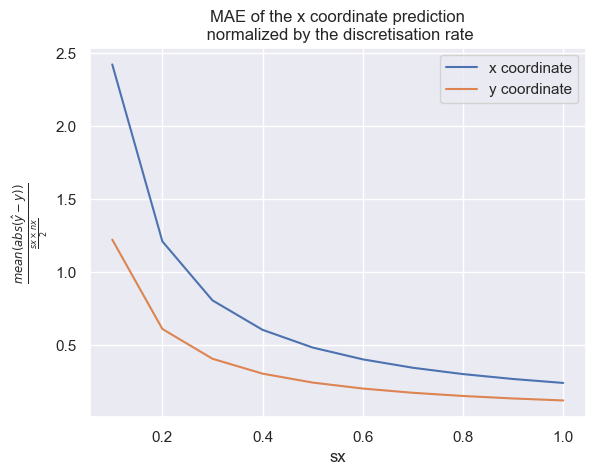

In [6]:
plt.plot(np.arange(0.1, 1.1, 0.1), norm_maes_x[::-1])
plt.plot(np.arange(0.1, 1.1, 0.1), norm_maes_y[::-1])
plt.ylabel(r'$\frac{mean(abs(\hat{y} - y))}{\frac{sx\times nx}{2}}$')
plt.xlabel("sx")
plt.legend(["x coordinate", "y coordinate"])
plt.title("MAE of the x coordinate prediction\n normalized by the discretisation rate")
plt.savefig("../../local/mae_x.jpg", dpi=250)

## Results
We will keep the normalized ratio for $sx=1.0$:

In [7]:
print("MAE on x:", norm_maes_x[0])
print("MAE on y:", norm_maes_y[0])

MAE on x: 0.24205547899007798
MAE on y: 0.12223712950944901
